## Import Essential Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import data

In [2]:
img = data.astronaut()
img.shape

(512, 512, 3)

## Plot Astronaut Image

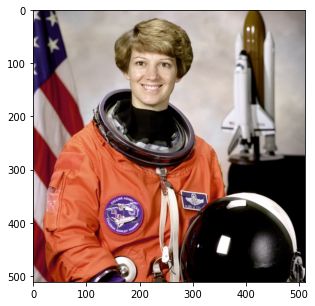

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(img)

### Define some common Filter(Kernel)

In [4]:
sharpen = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

edge = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])

gaussian = np.array([[1, 2, 1],
                  [2, 4, 2],
                  [1, 2, 1]]) / 16            
kernels = [sharpen, edge, gaussian]

### Plot Actual Image and Its Convolved Image

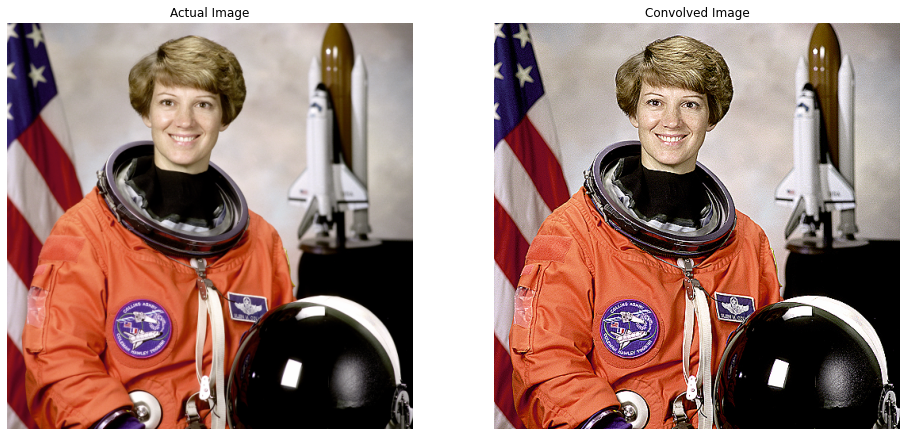

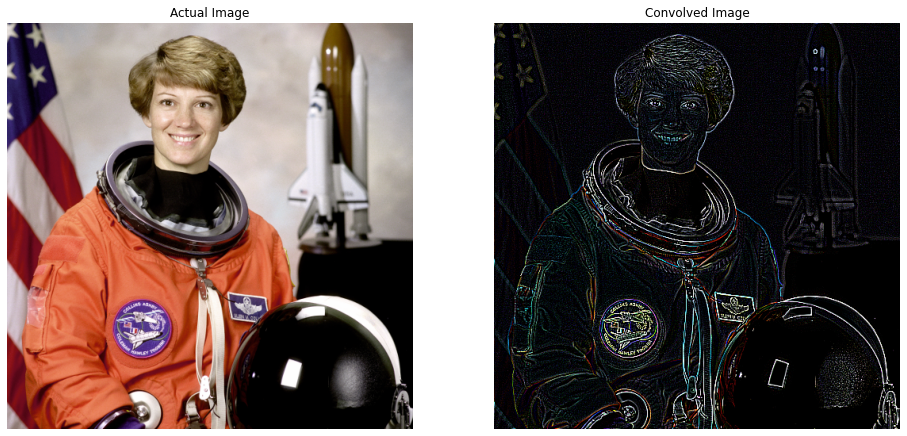

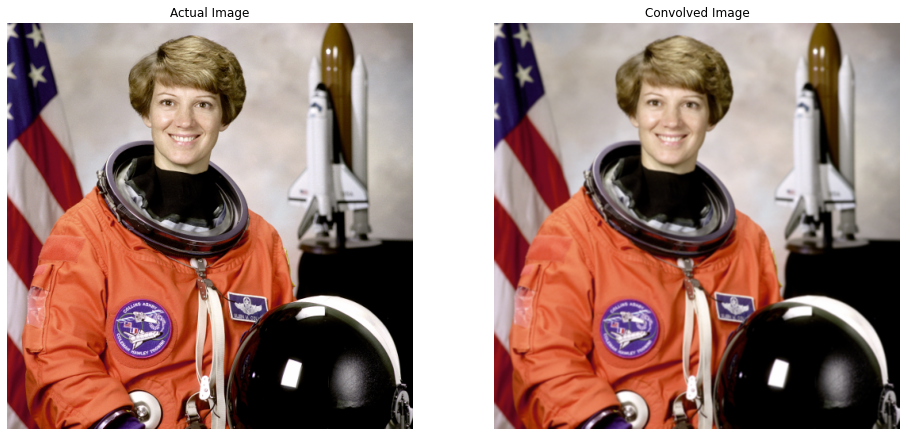

In [5]:
for k in kernels:
  Conv_img = cv2.filter2D(img, -1, k)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,32))
  ax[0].imshow(img)
  ax[0].axis('off')
  ax[0].set_title('Actual Image')
  ax[1].imshow(Conv_img)
  ax[1].axis('off')
  ax[1].set_title('Convolved Image')

## MNIST Data Set

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


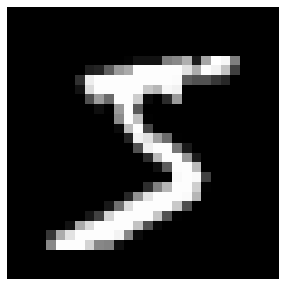

In [7]:
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(X_train[0], cmap='gray')

#### Convert y to Categorical Label(One Hot)

In [8]:
from keras.utils import to_categorical
num_class = 10
y_train_cat = to_categorical(y_train, num_class)
y_test_cat = to_categorical(y_test, num_class)

In [9]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 10)
(10000, 10)


### Train With ANN

#### Flatten the image array and Normalize it

In [10]:
X_train_flat = X_train.reshape(-1, 28*28) / 255
X_test_flat = X_test.reshape(-1, 28*28) / 255

In [11]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


#### Create Our ANN

In [12]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = keras.Sequential(
    [
        layers.Dense(32, input_dim=X_train_flat.shape[-1], activation="relu", name="input"),
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(10, activation="softmax", name="output")
    ],
    name="sequential_model"
)
model.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 32)                25120     
                                                                 
 layer1 (Dense)              (None, 32)                1056      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


#### Plot Model Layers

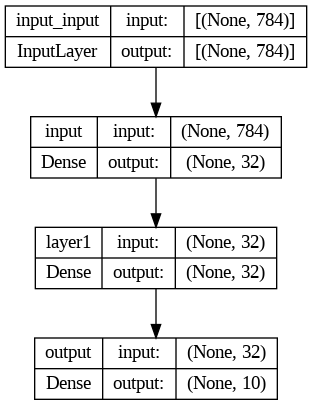

In [13]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Compile Model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_flat, y_train_cat, batch_size=64, epochs=10, verbose=2, validation_data=(X_test_flat, y_test_cat))

Epoch 1/10
938/938 - 8s - loss: 0.3987 - accuracy: 0.8882 - val_loss: 0.2257 - val_accuracy: 0.9329 - 8s/epoch - 9ms/step
Epoch 2/10
938/938 - 3s - loss: 0.1947 - accuracy: 0.9446 - val_loss: 0.1655 - val_accuracy: 0.9515 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.1513 - accuracy: 0.9561 - val_loss: 0.1399 - val_accuracy: 0.9581 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.1253 - accuracy: 0.9635 - val_loss: 0.1360 - val_accuracy: 0.9592 - 3s/epoch - 4ms/step
Epoch 5/10
938/938 - 3s - loss: 0.1070 - accuracy: 0.9684 - val_loss: 0.1209 - val_accuracy: 0.9639 - 3s/epoch - 3ms/step
Epoch 6/10
938/938 - 3s - loss: 0.0947 - accuracy: 0.9714 - val_loss: 0.1129 - val_accuracy: 0.9677 - 3s/epoch - 3ms/step
Epoch 7/10
938/938 - 3s - loss: 0.0851 - accuracy: 0.9742 - val_loss: 0.1183 - val_accuracy: 0.9638 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 4s - loss: 0.0773 - accuracy: 0.9759 - val_loss: 0.1200 - val_accuracy: 0.9650 - 4s/epoch - 4ms/step
Epoch 9/10
938/938 - 3s 

#### Plot Train Loss and Test Loss

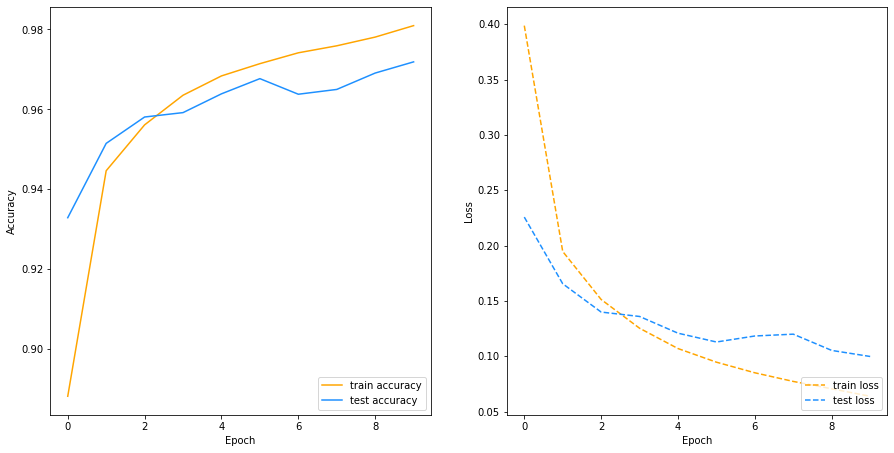

In [15]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

#### Measure Accuracy

In [16]:
loss, accuracy = model.evaluate(X_test_flat, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9719
Accuracy: 97.19


#### Predict

In [17]:
y_pred_nn = model.predict(X_test_flat)

313/313 [==============================] - 1s 2ms/step


#### Show Predictions

In [18]:
def gridshow(x, y, yp, n=5, mislabel=False):
  if mislabel:
    wrong_lable = np.where(yp != y)[0]
    grid = np.random.choice(wrong_lable, n**2)
    grid = grid.reshape(n, n)
  else:
    grid = np.random.randint(0, len(x), size=(n,n))

  fig, ax = plt.subplots(nrows=n, ncols=n, figsize=(2*n, 2*n))
  for i in range(n):
    for j in range(n):
      ax[i][j].imshow(x[grid[i,j]], cmap='gray')
      ax[i][j].axis('off')
      label = 'y = ' + str(y[grid[i][j]]) + ' | yp = ' + str(yp[grid[i][j]])
      ax[i][j].set_title(label)

##### True Prediction

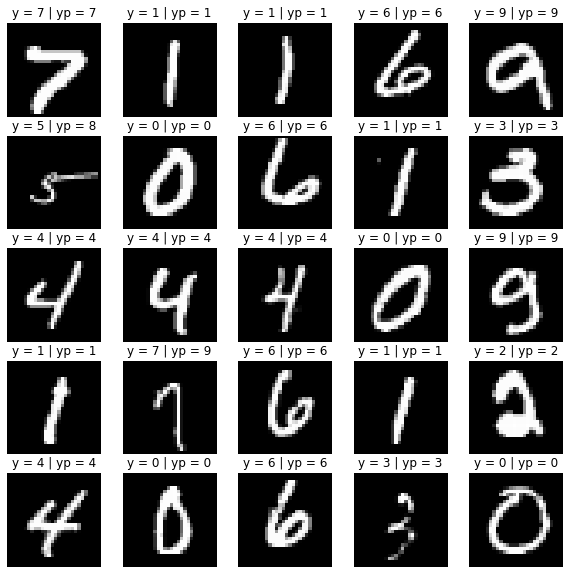

In [21]:
gridshow(X_test, y_test, np.argmax(y_pred_nn, axis=1), mislabel=False)

##### False Prediction

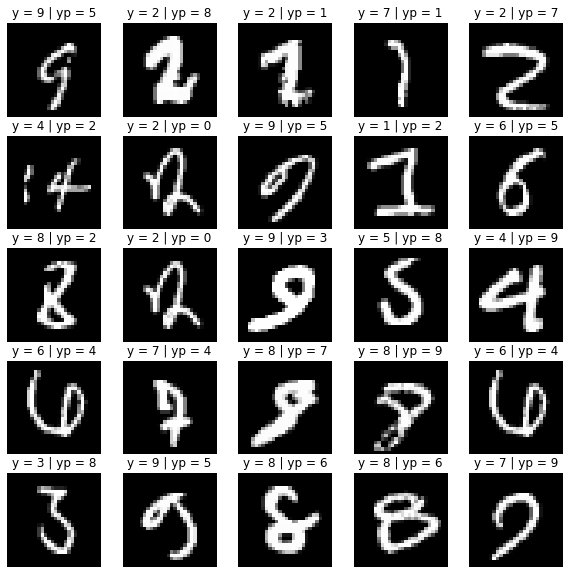

In [20]:
gridshow(X_test, y_test, np.argmax(y_pred_nn, axis=1), mislabel=True)

### Train With CNN

#### Reshape X_train and Normalized

In [22]:
X_train_norm = X_train.reshape(-1, 28, 28, 1) / 255
X_test_norm = X_test.reshape(-1, 28, 28, 1) / 255

In [23]:
print(X_train_norm.shape)
print(X_test_norm.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### Expand Dimension

also we can use another function for reshape images

In [24]:
X_train_norm = np.expand_dims(X_train, axis=-1) / 255
X_test_norm = np.expand_dims(X_test, axis=-1) / 255

In [25]:
print(X_train_norm.shape)
print(X_test_norm.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### Create Our CNN

In [26]:
from os import name
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential(
    [
        Conv2D(filters=10, kernel_size=(3,3), input_shape=X_train_norm.shape[1:], activation="relu", name="input"),
        Conv2D(filters=10, kernel_size=(3,3), activation="relu", name="conv2d"),
        MaxPool2D(pool_size=(2,2), name="maxpooling"),
        Flatten(name="flatten"),
     
        Dense(32, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(10, activation="softmax", name="output")
    ],
    name="CNN_Model"
)
model.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 26, 26, 10)        100       
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 10)        910       
                                                                 
 maxpooling (MaxPooling2D)   (None, 12, 12, 10)        0         
                                                                 
 flatten (Flatten)           (None, 1440)              0         
                                                                 
 layer1 (Dense)              (None, 32)                46112     
                                                                 
 layer2 (Dense)              (None, 32)                1056      
                                                                 
 output (Dense)              (None, 10)                33

#### Plot Model Layers

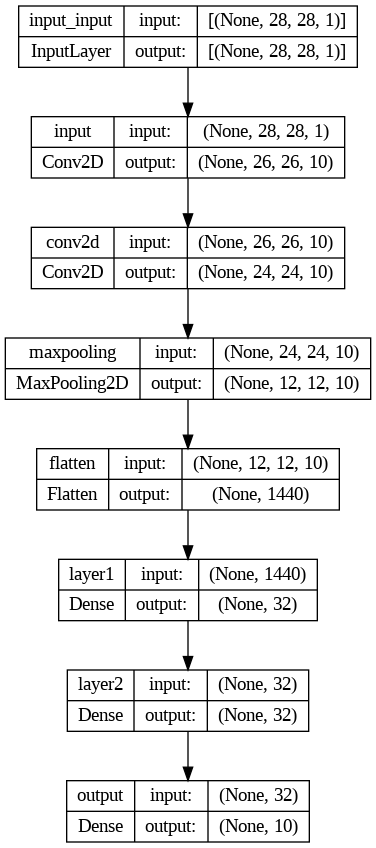

In [27]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Show Model Layers

In [28]:
model.layers

#### Weight of first Layer

In [29]:
model.layers[0].weights

[<tf.Variable 'input/kernel:0' shape=(3, 3, 1, 10) dtype=float32, numpy=
 array([[[[ 0.1613948 , -0.23530006,  0.17023703,  0.03924766,
           -0.1779095 , -0.0226243 , -0.1865991 ,  0.08921397,
           -0.116891  ,  0.13027635]],
 
         [[-0.0296386 , -0.0533562 , -0.05314232,  0.21634698,
           -0.04456294, -0.02513736,  0.21499678,  0.21963513,
            0.23136377,  0.11094213]],
 
         [[ 0.07809681,  0.10929954, -0.09905829,  0.05728129,
           -0.21935773,  0.00574267, -0.04527214,  0.1313571 ,
           -0.06224962, -0.09900381]]],
 
 
        [[[ 0.08833155,  0.11754754,  0.08058831, -0.05730876,
           -0.19327356,  0.13318413,  0.08096513, -0.12385211,
            0.1443316 , -0.0719807 ]],
 
         [[-0.08597308, -0.11815709, -0.03166197, -0.15008268,
           -0.15185994, -0.07043011, -0.14190492, -0.04075412,
           -0.0863512 ,  0.14124244]],
 
         [[-0.20375007, -0.23694403,  0.18729645,  0.20580181,
           -0.21324152,  0

#### Compile Model

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_norm, y_train_cat, batch_size=64, epochs=10, verbose=2, validation_data=(X_test_norm, y_test_cat))

Epoch 1/10
938/938 - 11s - loss: 0.3160 - accuracy: 0.9053 - val_loss: 0.0973 - val_accuracy: 0.9705 - 11s/epoch - 12ms/step
Epoch 2/10
938/938 - 4s - loss: 0.0905 - accuracy: 0.9733 - val_loss: 0.0593 - val_accuracy: 0.9823 - 4s/epoch - 4ms/step
Epoch 3/10
938/938 - 5s - loss: 0.0631 - accuracy: 0.9812 - val_loss: 0.0605 - val_accuracy: 0.9814 - 5s/epoch - 5ms/step
Epoch 4/10
938/938 - 5s - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0486 - val_accuracy: 0.9849 - 5s/epoch - 5ms/step
Epoch 5/10
938/938 - 7s - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0409 - val_accuracy: 0.9869 - 7s/epoch - 8ms/step
Epoch 6/10
938/938 - 6s - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0506 - val_accuracy: 0.9853 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 5s - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0448 - val_accuracy: 0.9861 - 5s/epoch - 6ms/step
Epoch 8/10
938/938 - 5s - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0409 - val_accuracy: 0.9881 - 5s/epoch - 5ms/step
Epoch 9/10
938/938 - 

#### Plot Train and Test Loss

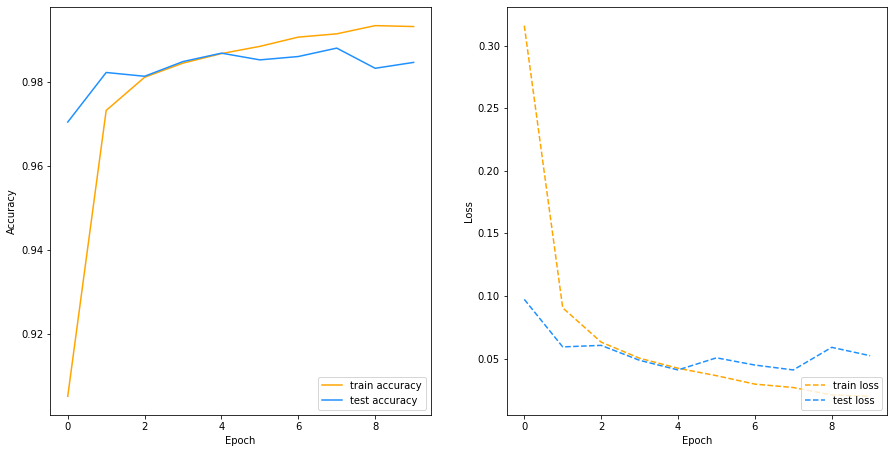

In [31]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

#### Measure Accuracy

In [32]:
loss, accuracy = model.evaluate(X_test_norm, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0523 - accuracy: 0.9847
Accuracy: 98.47


#### Predict

In [33]:
y_pred_cnn = model.predict(X_test_norm)

313/313 [==============================] - 1s 3ms/step


#### Show Predictions

##### True Prediction

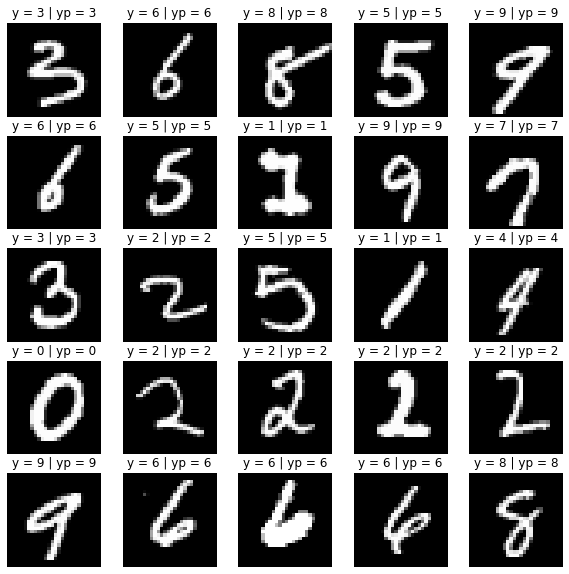

In [34]:
gridshow(X_test, y_test, np.argmax(y_pred_cnn, axis=1))

##### False Prediction

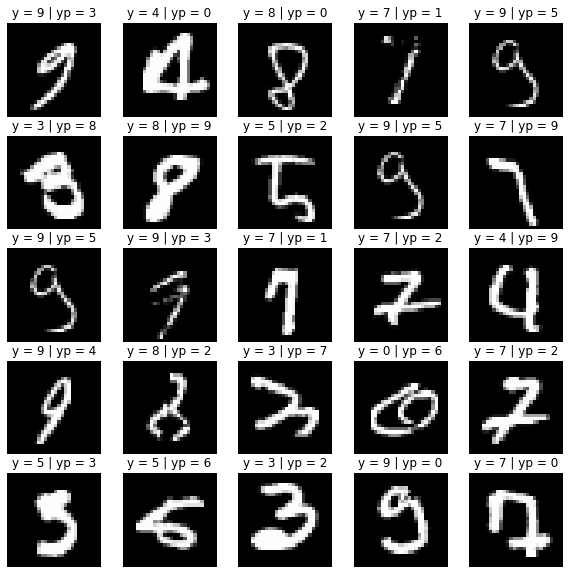

In [35]:
gridshow(X_test, y_test, np.argmax(y_pred_cnn, axis=1), mislabel=True)

#### Display Output of our CNN layers

In [37]:
out_layers = []
out = X_test_norm.copy()
for layer in model.layers:
  out = layer(out)
  print(out.shape)
  out_layers.append(out)

(10000, 26, 26, 10)
(10000, 24, 24, 10)
(10000, 12, 12, 10)
(10000, 1440)
(10000, 32)
(10000, 32)
(10000, 10)


##### First Layer Output

First Layer Output
(26, 26, 10)


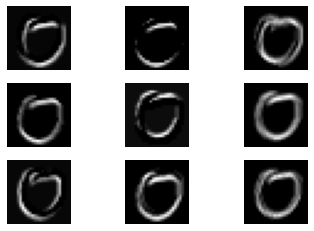

In [38]:
n = 2023
print("First Layer Output")
current_layer_out = out_layers[0][n]
print(current_layer_out.shape)
fig, ax = plt.subplots(3,3)
for i in range(9):
  ax[i//3][i%3].imshow(current_layer_out[:,:,i], cmap='gray')
  ax[i//3][i%3].axis('off')

##### Third Layer Output

Third Layer Output
(12, 12, 10)


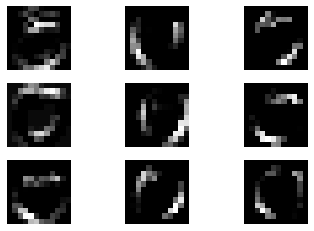

In [39]:
n = 2023
print("Third Layer Output")
current_layer_out = out_layers[2][n]
print(current_layer_out.shape)
fig, ax = plt.subplots(3,3)
for i in range(9):
  ax[i//3][i%3].imshow(current_layer_out[:,:,i], cmap='gray')
  ax[i//3][i%3].axis('off')